In [4]:
#using BP and White Testing for Heteroscedasticity
#going to use statsmodels for the OLS linear regression
#going to use the car models fuel economy df from breakout 3

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import matplotlib.pyplot as plt

%matplotlib inline

from win32com.client import Dispatch

In [20]:
file = ('data\car models fuel economy.csv')
df = pd.read_csv(file)
df

,Name,Cmpg,Eng,Inv_eng
0,Acura RL 3.7L,17,3.7,0.270270
1,Acura TL 2wd 3.5L,18,3.5,0.285714
2,Acura TL 4wd 3.7L,17,3.7,0.270270
3,Aston Martin DB9 5.9L,13,5.9,0.169492
4,Aston Martin DBS 5.9L,12,5.9,0.169492
...,...,...,...,...
346,Volvo XC60 Awd 3L,17,3.0,0.333333
347,Volvo XC60 Fwd 3.2L,18,3.2,0.312500
348,Volvo XC70 Awd 3.2L,18,3.2,0.312500
349,Volvo XC70 Awd 3L,17,3.0,0.333333


In [21]:
# #loading the jmp file into the environment as df
# jmp = Dispatch("JMP.Application")
# doc = jmp.OpenDocument("data/car models fuel economy.jmp")
# print(doc)

# doc.SaveAs("data/car models fuel economy.csv")

# df = pd.read_csv("data/car models fuel economy.csv")
# print(df.describe())

In [22]:
model1 = smf.ols(formula = 'Cmpg ~ Eng', data = df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cmpg   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     1055.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):          1.67e-107
Time:                        11:49:44   Log-Likelihood:                -727.57
No. Observations:                 351   AIC:                             1459.
Df Residuals:                     349   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7994      0.298     93.210      0.0

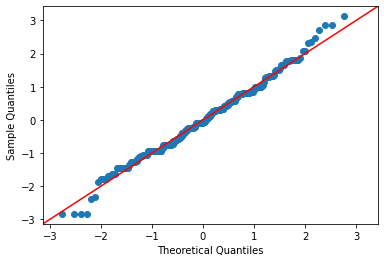

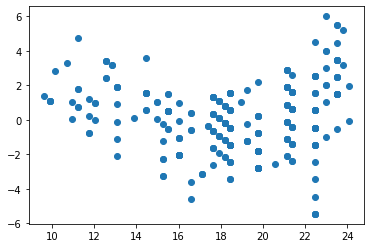

In [23]:
resid1 = model1.resid
fitted1 = model1.fittedvalues
#QQ plot of residuals
fig1 = sm.qqplot(resid1,fit=True,line='45')
#fitted v. residuals
fig, ax = plt.subplots()
_ = ax.scatter(fitted1, resid1)

In [24]:
# Breusch-Pagan Test for Heteroscedasticity
bptest = sms.diagnostic.het_breuschpagan(resid1,model1.model.exog)
# White Test for Heteroscedasticity, including squares and cross-product of exog
white_test = sms.diagnostic.het_white(resid1,model1.model.exog)

In [25]:
print('Breusch-Pagan Test and White LM Tests for Heteroscedasticity')
df1 = pd.DataFrame({'Test Type':['Breusch-Pagan Test', 'White Test'],
                   'Chi-Sq':[bptest[0], white_test[0]], 'DF':[2, 4],
                   'Prob>Chi-Sq':[bptest[1], white_test[1]]})
print(df1)

Breusch-Pagan Test and White LM Tests for Heteroscedasticity
            Test Type     Chi-Sq  DF   Prob>Chi-Sq
0  Breusch-Pagan Test  13.003549   2  3.109012e-04
1          White Test  41.592622   4  9.295589e-10


In [26]:
model2 = smf.ols(formula = 'Cmpg ~ Inv_eng', data = df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cmpg   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1374.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):          4.56e-123
Time:                        11:50:05   Log-Likelihood:                -691.56
No. Observations:                 351   AIC:                             1387.
Df Residuals:                     349   BIC:                             1395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7028      0.260     37.302      0.0

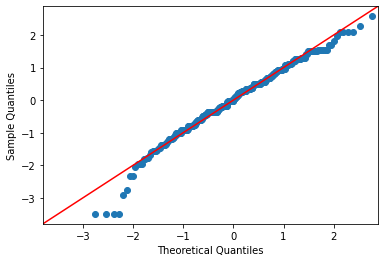

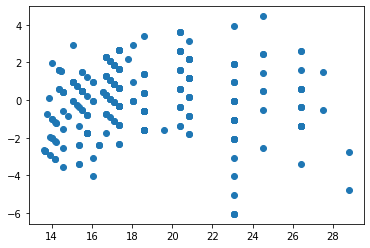

In [27]:
resid2 = model2.resid
fitted2 = model2.fittedvalues
#QQ plot of residuals
fig1 = sm.qqplot(resid2,fit=True,line='45')
#fitted v. residuals
fig, ax = plt.subplots()
_ = ax.scatter(fitted2, resid2)


In [ ]:
# Breusch-Pagan Test for Heteroscedasticity
bptest = sms.diagnostic.het_breuschpagan(resid2,model2.model.exog)
# White Test for Heteroscedasticity, including squares and cross-product of exog
white_test = sms.diagnostic.het_white(resid2,model2.model.exog)

In [ ]:
print('Breusch-Pagan Test and White LM Tests for Heteroscedasticity')
df2 = pd.DataFrame({'Test Type':['Breusch-Pagan Test', 'White Test'],
                   'Chi-Sq':[bptest[0], white_test[0]], 'DF':[2, 4],
                   'Prob>Chi-Sq':[bptest[1], white_test[1]]})
print(df2)

In [ ]:
df["Inv_cmpg"] = 1/df["Cmpg"] 

In [ ]:
model3 = smf.ols(formula = 'Inv_cmpg ~ Inv_eng', data = df).fit()
print(model3.summary())

In [ ]:
resid3 = model3.resid
fitted3 = model3.fittedvalues
#QQ plot of residuals
fig1 = sm.qqplot(resid3,fit=True,line='45')
#fitted v. residuals
fig, ax = plt.subplots()
_ = ax.scatter(fitted3, resid3)

In [ ]:
# Breusch-Pagan Test for Heteroscedasticity
bptest = sms.diagnostic.het_breuschpagan(resid3,model3.model.exog)
# White Test for Heteroscedasticity, including squares and cross-product of exog
white_test = sms.diagnostic.het_white(resid3,model3.model.exog)

In [ ]:
print('Breusch-Pagan Test and White LM Tests for Heteroscedasticity')
df3 = pd.DataFrame({'Test Type':['Breusch-Pagan Test', 'White Test'],
                   'Chi-Sq':[bptest[0], white_test[0]], 'DF':[2, 4],
                   'Prob>Chi-Sq':[bptest[1], white_test[1]]})
print(df3)

In [ ]:
df["lncmpg"] = np.log(df["Cmpg"])
df["lneng"] = np.log(df["Eng"])

In [ ]:
model4 = smf.ols(formula = 'lncmpg ~ lneng', data = df).fit()
print(model4.summary())
resid4 = model4.resid
fitted4 = model4.fittedvalues
#QQ plot of residuals
fig1 = sm.qqplot(resid4,fit=True,line='45')
#fitted v. residuals
fig, ax = plt.subplots()
_ = ax.scatter(fitted4, resid4)

# Breusch-Pagan Test for Heteroscedasticity
bptest = sms.diagnostic.het_breuschpagan(resid4,model4.model.exog)
# White Test for Heteroscedasticity, including squares and cross-product of exog
white_test = sms.diagnostic.het_white(resid4,model4.model.exog)

print('Breusch-Pagan Test and White LM Tests for Heteroscedasticity')
df4 = pd.DataFrame({'Test Type':['Breusch-Pagan Test', 'White Test'],
                   'Chi-Sq':[bptest[0], white_test[0]], 'DF':[2, 4],
                   'Prob>Chi-Sq':[bptest[1], white_test[1]]})
print(df4)

In [ ]:
# Breusch-Pagan Test for Heteroscedasticity
bptest = sms.diagnostic.het_breuschpagan(resid4,model4.model.exog)
# White Test for Heteroscedasticity, including squares and cross-product of exog
white_test = sms.diagnostic.het_white(resid4,model4.model.exog)

print('Breusch-Pagan Test and White LM Tests for Heteroscedasticity')
df4 = pd.DataFrame({'Test Type':['Breusch-Pagan Test', 'White Test'],
                   'Chi-Sq':[bptest[0], white_test[0]], 'DF':[2, 4],
                   'Prob>Chi-Sq':[bptest[1], white_test[1]]})
print(df4)